# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [1]:
# Import necessary packages and load `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('winequality_edited.csv')
df.head()

,alcohol,chlorides,citric_acid,color,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity,acidity_levels
0,9.4,0.076,0.00,RED,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,0.70,low
1,9.8,0.098,0.00,RED,0.9968,7.8,25.0,3.20,5,2.6,0.68,67.0,0.88,Mod high
2,9.8,0.092,0.04,RED,0.9970,7.8,15.0,3.26,5,2.3,0.65,54.0,0.76,Medium
3,9.8,0.075,0.56,RED,0.9980,11.2,17.0,3.16,6,1.9,0.58,60.0,0.28,Mod high
4,9.4,0.076,0.00,RED,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,0.70,low


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [2]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

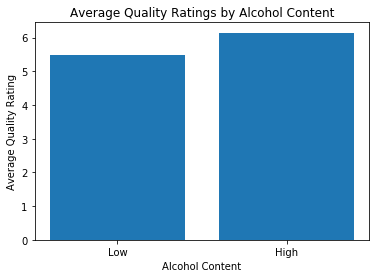

In [3]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [5]:
# Use query to select each group and get its mean quality
med_sug = df['residual_sugar'].median()
low_sug = df.query('residual_sugar < {}'.format(med_sug))
high_sug = df.query('residual_sugar >= {}'.format(med_sug))

mean_low_sug = low_sug['quality'].mean()
mean_high_sug = high_sug['quality'].mean()

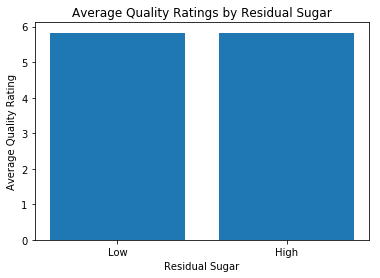

In [6]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_low_sug, mean_high_sug]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [16]:
# Use groupby to get the mean quality for each acidity level
mean_quality_acidity = df.groupby('acidity_levels').quality.mean()
mean_quality_acidity

acidity_levels
Medium      5.850832
Mod high    5.784540
high        5.783343
low         5.859593
Name: quality, dtype: float64

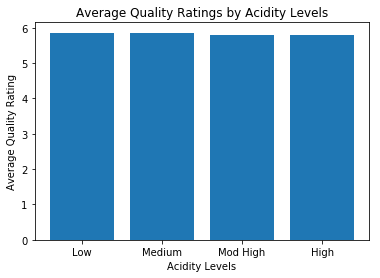

In [17]:
# Create a bar chart with proper labels
locations = [2, 3,4,1]
heights = mean_quality_acidity
labels = ['Medium', 'Mod High','High', 'Low']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Levels')
plt.xlabel('Acidity Levels')
plt.ylabel('Average Quality Rating');

### Bonus: Create a line plot for the data in #3
You can use pyplot's [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function for this.

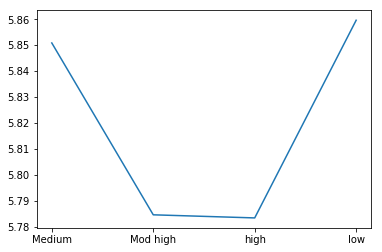

In [19]:
plt.plot(mean_quality_acidity);

Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?